In [ ]:
!git clone https://github.com/oKatanaaa/GCT

In [ ]:
!pip install --upgrade git+https://github.com/oKatanaaa/MakiFlow.git

In [ ]:
%tensorflow_version 1.x

In [1]:
from GCT.tools import load_cifar10
import matplotlib.pyplot as plt
from makiflow.models.classificator import Classificator, CETrainer
from makiflow.generators.classification import cycle_generator
import tensorflow as tf
from makiflow.layers import *
import numpy as np
%matplotlib inline

In [2]:
(Xtrain, Ytrain), (Xtest, Ytest), (X_mean, X_std) = load_cifar10()

In [3]:
BATCH_SIZE = 64

In [4]:
def block(x, id, in_f, out_f):
    SX = x
    FX = x
    
    FX = BatchNormLayer(D=in_f, name=f'bn_main_{id}_1')(FX)
    FX = ActivationLayer(name=f'act_1_{id}')(FX)
    FX = ConvLayer(kw=3, kh=3, in_f=in_f, out_f=out_f, name=f'conv_main_{id}_1', activation=None)(FX)
    
    FX = BatchNormLayer(D=out_f, name=f'bn_main_{id}_2')(FX)
    FX = ActivationLayer(name=f'act_2_{id}')(FX)
    FX = ConvLayer(kw=3, kh=3, in_f=out_f, out_f=out_f, name=f'conv_main_{id}_2', activation=None)(FX)

    SX = BatchNormLayer(D=in_f, name=f'bn_skip_{id}_1')(SX)
    SX = ConvLayer(kw=1, kh=1, in_f=in_f, out_f=out_f, name=f'conv_skip_{id}', activation=None)(SX)
    
    x_sum = SumLayer(name=f'sum_{id}')([FX, SX])
    return x_sum

In [5]:
# Create a model

In [6]:
inp = InputLayer(input_shape=[BATCH_SIZE, 32, 32, 3], name='input')
x = block(inp, id=1, in_f=3, out_f=32)
x = MaxPoolLayer(name='mp1')(x)
# 16x16
x = block(x, id=2, in_f=32, out_f=64)
x = MaxPoolLayer(name='mp2')(x)
# 8x8
x = block(x, id=3, in_f=64, out_f=128)
x = MaxPoolLayer(name='mp3')(x)
# 4x4
x = block(x, id=4, in_f=128, out_f=256)
x = MaxPoolLayer(name='mp4')(x)
# 2x2
x = FlattenLayer('flat')(x)
# 4*256 = 1024
x = DenseLayer(in_d=1024, out_d=256, name='projection_head')(x)
x = DenseLayer(in_d=256, out_d=10, activation=None, name='classification_head')(x)



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [7]:
model = Classificator(in_x=inp, out_x=x)
sess = tf.Session()
model.set_session(sess)

In [8]:
# Setup training

In [9]:
trainer = CETrainer(model=model, train_inputs=[InputLayer(input_shape=[BATCH_SIZE, 32, 32, 3], name='input')])

In [10]:
trainer.compile()

Compile the model...

Model is compiled.

Loss is built.


In [11]:
opt = tf.train.AdamOptimizer()

In [12]:
gen = cycle_generator(Xtrain, Ytrain.reshape(-1), BATCH_SIZE)

In [13]:
info1 = trainer.fit_generator(gen, optimizer=opt, epochs=5, iter=100, print_period=10)

  0%|          | 0/100 [00:00<?, ?it/s]

New optimizer is used.


 10%|█         | 10/100 [00:04<00:28,  3.13it/s]

Epoch: 0 Cross_Entropy: 4.0379 Training_Loss: 4.0379 


 20%|██        | 20/100 [00:06<00:17,  4.58it/s]

Epoch: 0 Cross_Entropy: 2.9294 Training_Loss: 2.9294 


 30%|███       | 30/100 [00:09<00:15,  4.47it/s]

Epoch: 0 Cross_Entropy: 2.3130 Training_Loss: 2.3130 


 40%|████      | 40/100 [00:11<00:13,  4.45it/s]

Epoch: 0 Cross_Entropy: 2.0040 Training_Loss: 2.0040 


 50%|█████     | 50/100 [00:13<00:10,  4.55it/s]

Epoch: 0 Cross_Entropy: 1.8643 Training_Loss: 1.8643 


 60%|██████    | 60/100 [00:15<00:08,  4.62it/s]

Epoch: 0 Cross_Entropy: 1.7460 Training_Loss: 1.7460 


 70%|███████   | 70/100 [00:17<00:06,  4.56it/s]

Epoch: 0 Cross_Entropy: 1.7638 Training_Loss: 1.7638 


 80%|████████  | 80/100 [00:20<00:04,  4.62it/s]

Epoch: 0 Cross_Entropy: 1.6390 Training_Loss: 1.6390 


 90%|█████████ | 90/100 [00:22<00:02,  4.44it/s]

Epoch: 0 Cross_Entropy: 1.6567 Training_Loss: 1.6567 


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 Cross_Entropy: 1.6107 Training_Loss: 1.6107 


 10%|█         | 10/100 [00:02<00:20,  4.43it/s]

Epoch: 1 Cross_Entropy: 1.5588 Training_Loss: 1.5588 


 20%|██        | 20/100 [00:04<00:17,  4.56it/s]

Epoch: 1 Cross_Entropy: 1.5541 Training_Loss: 1.5541 


 30%|███       | 30/100 [00:06<00:15,  4.48it/s]

Epoch: 1 Cross_Entropy: 1.5158 Training_Loss: 1.5158 


 40%|████      | 40/100 [00:08<00:13,  4.45it/s]

Epoch: 1 Cross_Entropy: 1.5382 Training_Loss: 1.5382 


 50%|█████     | 50/100 [00:11<00:11,  4.53it/s]

Epoch: 1 Cross_Entropy: 1.4839 Training_Loss: 1.4839 


 60%|██████    | 60/100 [00:13<00:08,  4.62it/s]

Epoch: 1 Cross_Entropy: 1.4720 Training_Loss: 1.4720 


 70%|███████   | 70/100 [00:15<00:06,  4.58it/s]

Epoch: 1 Cross_Entropy: 1.4663 Training_Loss: 1.4663 


 80%|████████  | 80/100 [00:17<00:04,  4.53it/s]

Epoch: 1 Cross_Entropy: 1.4372 Training_Loss: 1.4372 


 90%|█████████ | 90/100 [00:19<00:02,  4.70it/s]

Epoch: 1 Cross_Entropy: 1.4443 Training_Loss: 1.4443 


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 Cross_Entropy: 1.4050 Training_Loss: 1.4050 


 10%|█         | 10/100 [00:02<00:19,  4.64it/s]

Epoch: 2 Cross_Entropy: 1.3010 Training_Loss: 1.3010 


 20%|██        | 20/100 [00:04<00:17,  4.57it/s]

Epoch: 2 Cross_Entropy: 1.3816 Training_Loss: 1.3816 


 30%|███       | 30/100 [00:06<00:15,  4.58it/s]

Epoch: 2 Cross_Entropy: 1.3066 Training_Loss: 1.3066 


 40%|████      | 40/100 [00:08<00:13,  4.49it/s]

Epoch: 2 Cross_Entropy: 1.2981 Training_Loss: 1.2981 


 50%|█████     | 50/100 [00:10<00:10,  4.57it/s]

Epoch: 2 Cross_Entropy: 1.3321 Training_Loss: 1.3321 


 60%|██████    | 60/100 [00:13<00:08,  4.65it/s]

Epoch: 2 Cross_Entropy: 1.2873 Training_Loss: 1.2873 


 70%|███████   | 70/100 [00:15<00:06,  4.62it/s]

Epoch: 2 Cross_Entropy: 1.2182 Training_Loss: 1.2182 


 80%|████████  | 80/100 [00:17<00:04,  4.62it/s]

Epoch: 2 Cross_Entropy: 1.2122 Training_Loss: 1.2122 


 90%|█████████ | 90/100 [00:19<00:02,  4.46it/s]

Epoch: 2 Cross_Entropy: 1.2280 Training_Loss: 1.2280 


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 2 Cross_Entropy: 1.2588 Training_Loss: 1.2588 


 10%|█         | 10/100 [00:02<00:20,  4.43it/s]

Epoch: 3 Cross_Entropy: 1.2167 Training_Loss: 1.2167 


 20%|██        | 20/100 [00:04<00:17,  4.59it/s]

Epoch: 3 Cross_Entropy: 1.2071 Training_Loss: 1.2071 


 30%|███       | 30/100 [00:06<00:15,  4.56it/s]

Epoch: 3 Cross_Entropy: 1.2206 Training_Loss: 1.2206 


 40%|████      | 40/100 [00:08<00:13,  4.56it/s]

Epoch: 3 Cross_Entropy: 1.2411 Training_Loss: 1.2411 


 50%|█████     | 50/100 [00:10<00:10,  4.63it/s]

Epoch: 3 Cross_Entropy: 1.2483 Training_Loss: 1.2483 


 60%|██████    | 60/100 [00:13<00:08,  4.54it/s]

Epoch: 3 Cross_Entropy: 1.2109 Training_Loss: 1.2109 


 70%|███████   | 70/100 [00:15<00:06,  4.63it/s]

Epoch: 3 Cross_Entropy: 1.1659 Training_Loss: 1.1659 


 80%|████████  | 80/100 [00:17<00:04,  4.64it/s]

Epoch: 3 Cross_Entropy: 1.1770 Training_Loss: 1.1770 


 90%|█████████ | 90/100 [00:19<00:02,  4.69it/s]

Epoch: 3 Cross_Entropy: 1.1623 Training_Loss: 1.1623 


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 3 Cross_Entropy: 1.1452 Training_Loss: 1.1452 


 10%|█         | 10/100 [00:02<00:19,  4.55it/s]

Epoch: 4 Cross_Entropy: 1.1491 Training_Loss: 1.1491 


 20%|██        | 20/100 [00:04<00:17,  4.65it/s]

Epoch: 4 Cross_Entropy: 1.1023 Training_Loss: 1.1023 


 30%|███       | 30/100 [00:06<00:15,  4.63it/s]

Epoch: 4 Cross_Entropy: 1.1039 Training_Loss: 1.1039 


 40%|████      | 40/100 [00:08<00:12,  4.65it/s]

Epoch: 4 Cross_Entropy: 1.1152 Training_Loss: 1.1152 


 50%|█████     | 50/100 [00:10<00:10,  4.65it/s]

Epoch: 4 Cross_Entropy: 1.1243 Training_Loss: 1.1243 


 60%|██████    | 60/100 [00:12<00:08,  4.66it/s]

Epoch: 4 Cross_Entropy: 1.0991 Training_Loss: 1.0991 


 70%|███████   | 70/100 [00:15<00:06,  4.64it/s]

Epoch: 4 Cross_Entropy: 1.0950 Training_Loss: 1.0950 


 80%|████████  | 80/100 [00:17<00:04,  4.64it/s]

Epoch: 4 Cross_Entropy: 1.0511 Training_Loss: 1.0511 


 90%|█████████ | 90/100 [00:19<00:02,  4.57it/s]

Epoch: 4 Cross_Entropy: 1.0643 Training_Loss: 1.0643 


100%|██████████| 100/100 [00:21<00:00,  4.63it/s]

Epoch: 4 Cross_Entropy: 1.0336 Training_Loss: 1.0336 


In [14]:
model.evaluate(Xtest, Ytest.reshape(-1))

100%|██████████| 156/156 [00:00<00:00, 176.47it/s]


(0.3942, 1.1040192315211663)

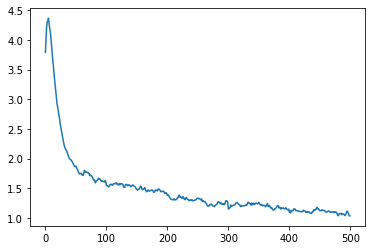

In [18]:
plt.plot(info1[CETrainer.TRAINING_LOSS])